In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Load the image in Grayscale

In [2]:
image = cv2.imread('runway.png', cv2.IMREAD_GRAYSCALE)

2. Normalize image to range [0, 1] as required by 'r'

In [3]:
r = image.astype(float) / 255.0

--- Part (a): Gamma correction with γ=0.5. ---

In [4]:
gamma_a = 0.5
s_a = np.power(r, gamma_a)

--- Part (b):Gamma correction with γ=2.

In [5]:
gamma_b = 2.0
s_b = np.power(r, gamma_b)

--- Part (c):Contrast Stretching (linear piecewise transformation)

In [6]:
r1, r2 = 0.2, 0.8

Initialize output array

In [7]:
s_c = np.zeros_like(r)

Apply the conditions
Condition 1: r < r1 -> becomes 0 (already handled by zeros initialization)

Condition 2: r1 <= r <= r2 -> Apply formula

In [8]:
mask_mid = (r >= r1) & (r <= r2)
s_c[mask_mid] = (r[mask_mid] - r1) / (r2 - r1)

Condition 3: r > r2 -> becomes 1

In [9]:
s_c[r > r2] = 1.0

--- Display Results ---

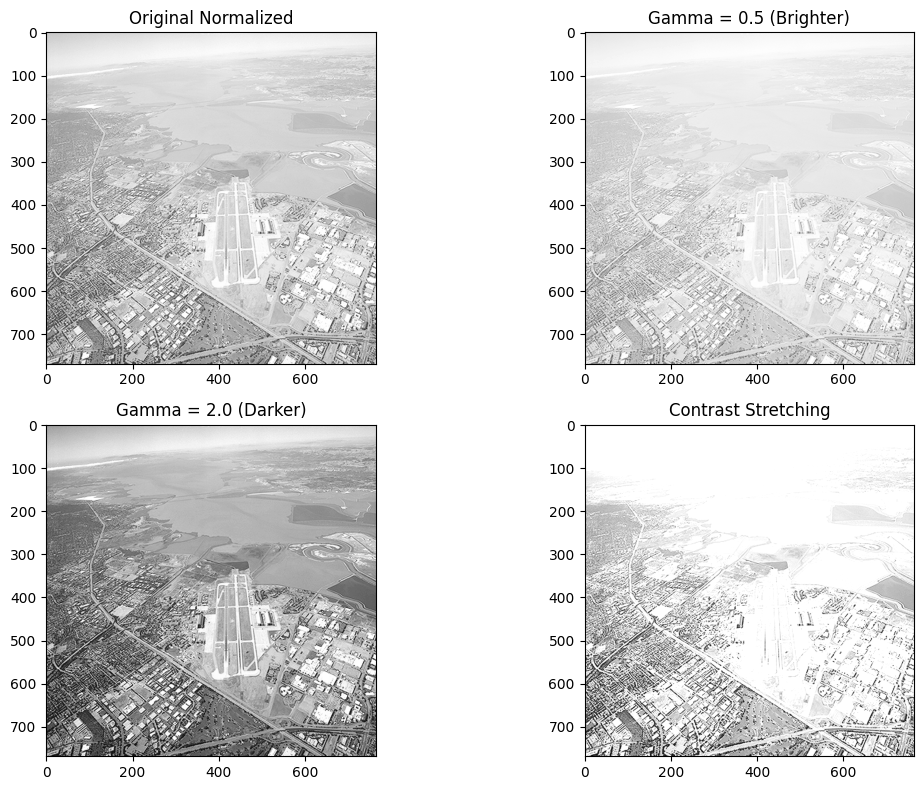

In [10]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(r, cmap='gray')
plt.title('Original Normalized')

plt.subplot(2, 2, 2)
plt.imshow(s_a, cmap='gray')
plt.title('Gamma = 0.5 (Brighter)')

plt.subplot(2, 2, 3)
plt.imshow(s_b, cmap='gray')
plt.title('Gamma = 2.0 (Darker)')

plt.subplot(2, 2, 4)
plt.imshow(s_c, cmap='gray')
plt.title('Contrast Stretching')

plt.tight_layout()
plt.show()